#*AIRLINE PRICE FORECASTING*

##Importing required Libraries


In [48]:
import pandas as pd
import numpy as np
from typing_extensions import final
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import QuantileTransformer
from os import stat_result
from scipy.stats import kstest
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# settings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ADM-FinalProject/data/combined_flight_data.csv')
data.head()

,Unnamed: 0,to,from,date_to,date_from,pos_overall,url,type,price,airline,duration
0,0,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,Nonstop,258,Spirit,5h 42m
1,1,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,Nonstop,358,American,5h 46m
2,2,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,Nonstop,358,Delta,5h 54m
3,3,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,Connecting,412,Alaska,10h 15m+
4,4,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-18,2023-12-11,1.0,https://www.google.com/travel/flights?sca_esv=...,Nonstop,228,Spirit,5h 42m


##Exploratory Data Analysis

In [4]:
data.columns

Index(['Unnamed: 0', 'to', 'from', 'date_to', 'date_from', 'pos_overall',
       'url', 'type', 'price', 'airline', 'duration'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0       int64
to              object
from            object
date_to         object
date_from       object
pos_overall    float64
url             object
type            object
price            int64
airline         object
duration        object
dtype: object

In [6]:
data.airline.value_counts()

Spirit                      1534
United                      1221
American                    1034
Delta                        666
Multiple airlines            534
JetBlue                      396
Alaska                       243
Frontier                     222
Southwest                     48
Other airlines                36
Allegiant                      9
Sun Country Airlines           5
Southern Airways Express       4
Name: airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

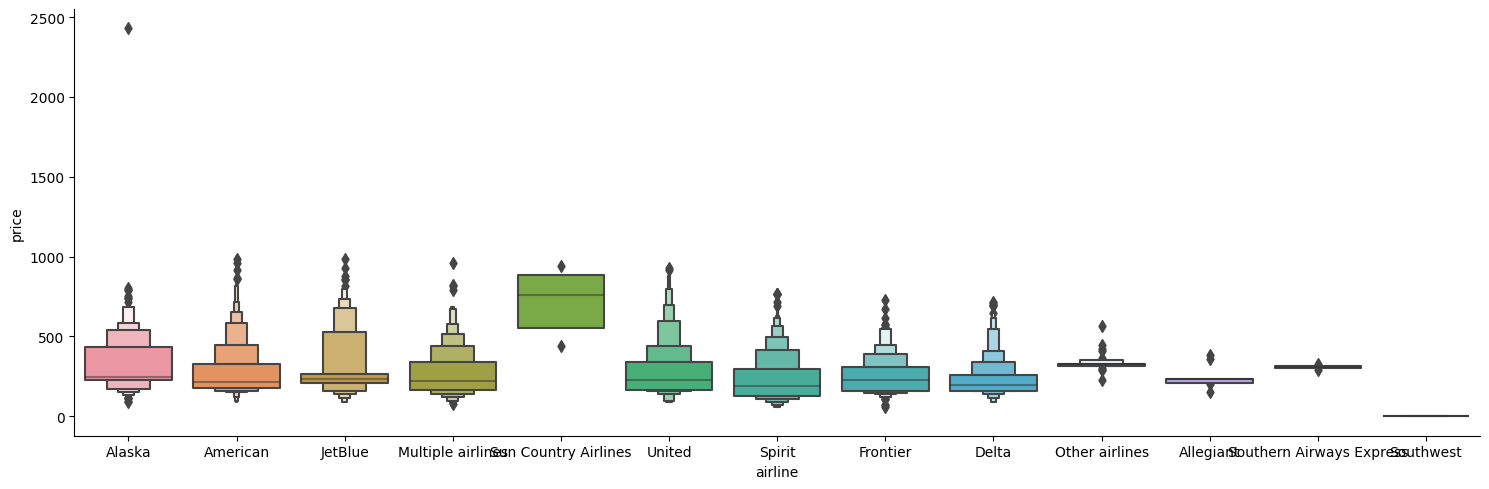

In [7]:
sns.catplot(x='airline', y='price', data=data.sort_values('price', ascending=False), kind='boxen', height=5, aspect=3)
plt.show

In [8]:
Airline = data[['airline']]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,airline_Allegiant,airline_American,airline_Delta,airline_Frontier,airline_JetBlue,airline_Multiple airlines,airline_Other airlines,airline_Southern Airways Express,airline_Southwest,airline_Spirit,airline_Sun Country Airlines,airline_United
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
data.to.value_counts()

Phoenix, AZ (all airports)       600
San Diego, CA (SAN)              600
Chicago, IL (all airports)       512
Houston, TX (all airports)       512
Los Angeles, CA (LAX)            300
New York, NY (all airports)      300
Columbus, OH (CMH)               248
Philadelphia, PA (PHL)           248
Charlotte, NC (CLT)              248
Dallas, TX (all airports)        248
San Jose, CA (SJC)               248
Jacksonville, FL (JAX)           248
Indianapolis, IN (IND)           248
Austin, TX (AUS)                 244
San Francisco, CA (SFO)          244
San Antonio, TX (SAT)            240
Fort Worth (DFW)                 236
Seattle, WA (SEA)                180
Denver, CO (DEN)                 124
Washington, DC (all airports)    124
Name: to, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

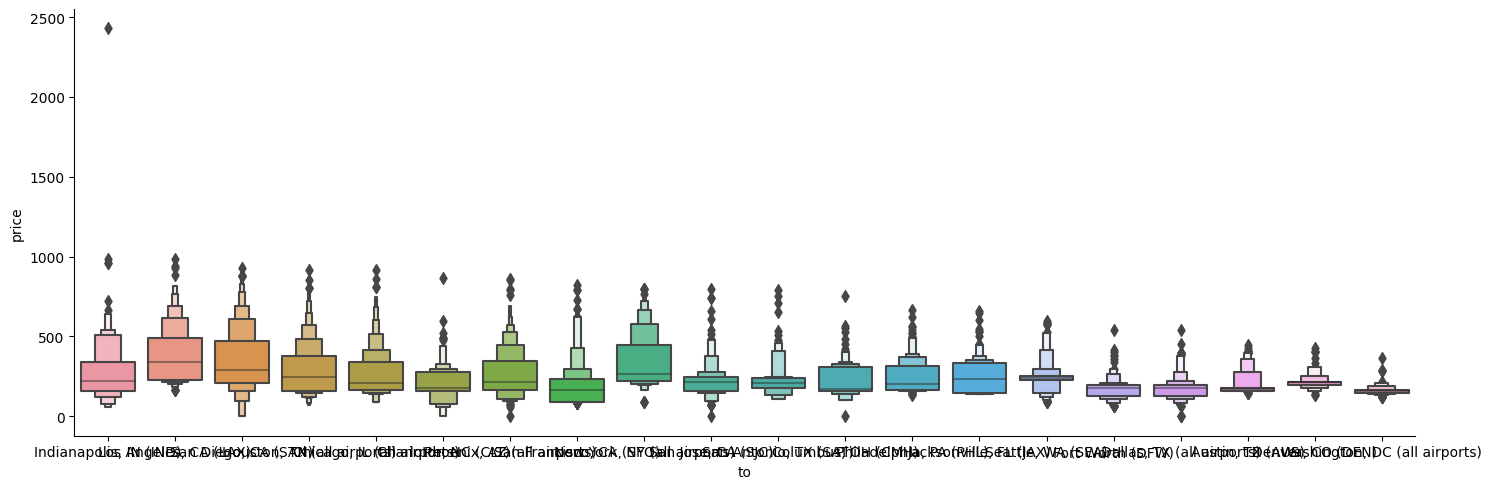

In [10]:
sns.catplot(x='to', y='price', data=data.sort_values('price', ascending=False), kind='boxen', height=5, aspect=3)
plt.show

In [11]:
Destination = data[['to']]

Destination = pd.get_dummies(Destination)

Destination.head()

,"to_Austin, TX (AUS)","to_Charlotte, NC (CLT)","to_Chicago, IL (all airports)","to_Columbus, OH (CMH)","to_Dallas, TX (all airports)","to_Denver, CO (DEN)",to_Fort Worth (DFW),"to_Houston, TX (all airports)","to_Indianapolis, IN (IND)","to_Jacksonville, FL (JAX)","to_Los Angeles, CA (LAX)","to_New York, NY (all airports)","to_Philadelphia, PA (PHL)","to_Phoenix, AZ (all airports)","to_San Antonio, TX (SAT)","to_San Diego, CA (SAN)","to_San Francisco, CA (SFO)","to_San Jose, CA (SJC)","to_Seattle, WA (SEA)","to_Washington, DC (all airports)"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
data['from'].value_counts()

New York, NY (all airports)    2784
Los Angeles, CA (LAX)          2464
Chicago, IL (all airports)      440
Houston, TX (all airports)      264
Name: from, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

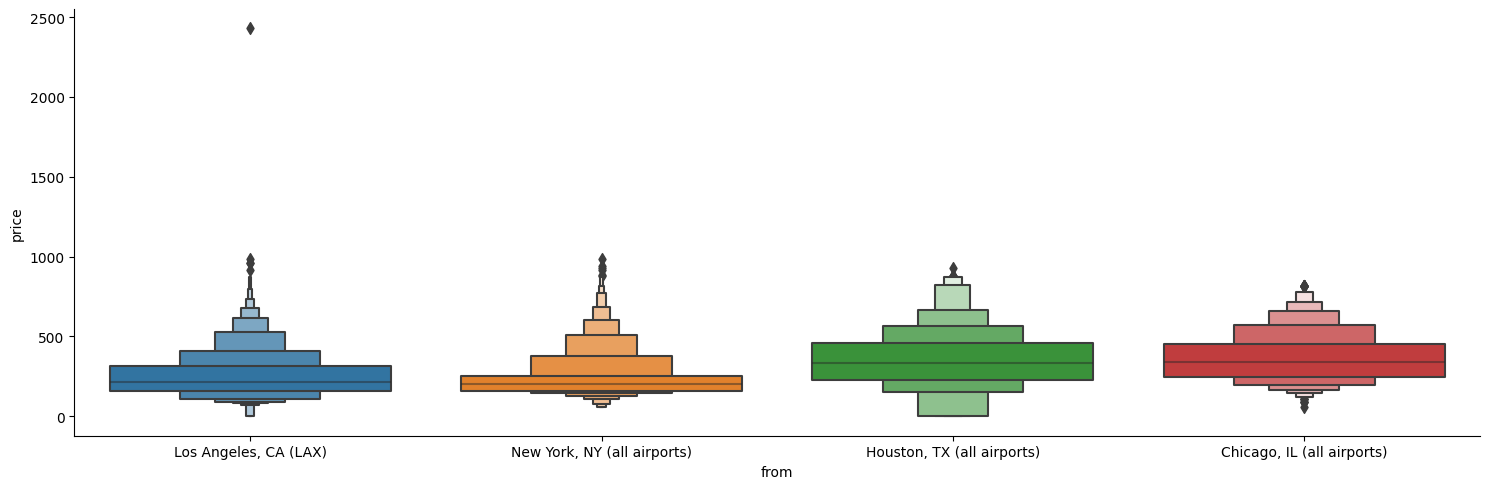

In [13]:
sns.catplot(x='from', y='price', data=data.sort_values('price', ascending=False), kind='boxen', height=5, aspect=3)
plt.show

In [14]:
Source = data[['from']]

Source = pd.get_dummies(Source)

Source.head()

,"from_Chicago, IL (all airports)","from_Houston, TX (all airports)","from_Los Angeles, CA (LAX)","from_New York, NY (all airports)"
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [15]:
data.replace({'Nonstop':0,'Connecting':1},inplace = True)
data.head()

,Unnamed: 0,to,from,date_to,date_from,pos_overall,url,type,price,airline,duration
0,0,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,0,258,Spirit,5h 42m
1,1,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,0,358,American,5h 46m
2,2,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,0,358,Delta,5h 54m
3,3,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,1,412,Alaska,10h 15m+
4,4,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-18,2023-12-11,1.0,https://www.google.com/travel/flights?sca_esv=...,0,228,Spirit,5h 42m


In [16]:
# Assuming 'duration' is in the format HH:MM
data['duration'] = pd.to_timedelta(data['duration'])
data['duration_hours'] = data['duration'].dt.components['hours']
data['duration_minutes'] = data['duration'].dt.components['minutes']
data.drop('duration', axis=1, inplace=True)  # Drop the original duration column if needed

data.head()

,Unnamed: 0,to,from,date_to,date_from,pos_overall,url,type,price,airline,duration_hours,duration_minutes
0,0,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,0,258,Spirit,5,42
1,1,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,0,358,American,5,46
2,2,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,0,358,Delta,5,54
3,3,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-16,2023-12-10,1.0,https://www.google.com/travel/flights?sca_esv=...,1,412,Alaska,10,15
4,4,"Phoenix, AZ (all airports)","New York, NY (all airports)",2023-12-18,2023-12-11,1.0,https://www.google.com/travel/flights?sca_esv=...,0,228,Spirit,5,42


In [17]:
data.drop(['Unnamed: 0','pos_overall','url','airline','to','from'],axis=1,inplace=True)
data.head()

,date_to,date_from,type,price,duration_hours,duration_minutes
0,2023-12-16,2023-12-10,0,258,5,42
1,2023-12-16,2023-12-10,0,358,5,46
2,2023-12-16,2023-12-10,0,358,5,54
3,2023-12-16,2023-12-10,1,412,10,15
4,2023-12-18,2023-12-11,0,228,5,42


In [18]:
final_data = pd.concat([data,Airline,Destination,Source],axis=1)
final_data.head()

,date_to,date_from,type,price,duration_hours,duration_minutes,airline_Allegiant,airline_American,airline_Delta,airline_Frontier,...,"to_San Antonio, TX (SAT)","to_San Diego, CA (SAN)","to_San Francisco, CA (SFO)","to_San Jose, CA (SJC)","to_Seattle, WA (SEA)","to_Washington, DC (all airports)","from_Chicago, IL (all airports)","from_Houston, TX (all airports)","from_Los Angeles, CA (LAX)","from_New York, NY (all airports)"
0,2023-12-16,2023-12-10,0,258,5,42,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2023-12-16,2023-12-10,0,358,5,46,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2023-12-16,2023-12-10,0,358,5,54,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2023-12-16,2023-12-10,1,412,10,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2023-12-18,2023-12-11,0,228,5,42,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
final_data['date_from'] = pd.to_datetime(final_data['date_from'])
final_data['date_to'] = pd.to_datetime(final_data['date_to'])

In [20]:
final_data['Journey_day_dep'] = pd.to_datetime(final_data['date_from'],format="%d/%m/%Y").dt.day
final_data['Journey_month_dep'] = pd.to_datetime(final_data['date_from'], format="%d/%m/%Y").dt.month

In [21]:
final_data['Journey_day_arr'] = pd.to_datetime(final_data['date_to'],format="%d/%m/%Y").dt.day
final_data['Journey_month_arr'] = pd.to_datetime(final_data['date_to'], format="%d/%m/%Y").dt.month

In [22]:
final_data.head()

,date_to,date_from,type,price,duration_hours,duration_minutes,airline_Allegiant,airline_American,airline_Delta,airline_Frontier,...,"to_Seattle, WA (SEA)","to_Washington, DC (all airports)","from_Chicago, IL (all airports)","from_Houston, TX (all airports)","from_Los Angeles, CA (LAX)","from_New York, NY (all airports)",Journey_day_dep,Journey_month_dep,Journey_day_arr,Journey_month_arr
0,2023-12-16,2023-12-10,0,258,5,42,0,0,0,0,...,0,0,0,0,0,1,10,12,16,12
1,2023-12-16,2023-12-10,0,358,5,46,0,1,0,0,...,0,0,0,0,0,1,10,12,16,12
2,2023-12-16,2023-12-10,0,358,5,54,0,0,1,0,...,0,0,0,0,0,1,10,12,16,12
3,2023-12-16,2023-12-10,1,412,10,15,0,0,0,0,...,0,0,0,0,0,1,10,12,16,12
4,2023-12-18,2023-12-11,0,228,5,42,0,0,0,0,...,0,0,0,0,0,1,11,12,18,12


In [23]:
final_data.shape

(5952, 46)

In [24]:
final_data.columns

Index(['date_to', 'date_from', 'type', 'price', 'duration_hours',
       'duration_minutes', 'airline_Allegiant', 'airline_American',
       'airline_Delta', 'airline_Frontier', 'airline_JetBlue',
       'airline_Multiple airlines', 'airline_Other airlines',
       'airline_Southern Airways Express', 'airline_Southwest',
       'airline_Spirit', 'airline_Sun Country Airlines', 'airline_United',
       'to_Austin, TX (AUS)', 'to_Charlotte, NC (CLT)',
       'to_Chicago, IL (all airports)', 'to_Columbus, OH (CMH)',
       'to_Dallas, TX (all airports)', 'to_Denver, CO (DEN)',
       'to_Fort Worth (DFW)', 'to_Houston, TX (all airports)',
       'to_Indianapolis, IN (IND)', 'to_Jacksonville, FL (JAX)',
       'to_Los Angeles, CA (LAX)', 'to_New York, NY (all airports)',
       'to_Philadelphia, PA (PHL)', 'to_Phoenix, AZ (all airports)',
       'to_San Antonio, TX (SAT)', 'to_San Diego, CA (SAN)',
       'to_San Francisco, CA (SFO)', 'to_San Jose, CA (SJC)',
       'to_Seattle, WA (SEA)',

In [25]:
final_data.dtypes

date_to                             datetime64[ns]
date_from                           datetime64[ns]
type                                         int64
price                                        int64
duration_hours                               int64
duration_minutes                             int64
airline_Allegiant                            uint8
airline_American                             uint8
airline_Delta                                uint8
airline_Frontier                             uint8
airline_JetBlue                              uint8
airline_Multiple airlines                    uint8
airline_Other airlines                       uint8
airline_Southern Airways Express             uint8
airline_Southwest                            uint8
airline_Spirit                               uint8
airline_Sun Country Airlines                 uint8
airline_United                               uint8
to_Austin, TX (AUS)                          uint8
to_Charlotte, NC (CLT)         

##Normalizing the data

In [26]:
stat_result, p_value = kstest(final_data['duration_hours'], 'norm')
print(stat_result)

if p_value < 0.05:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')

0.8683789003098853
The data is not normally distributed


In [27]:
transformer = QuantileTransformer(n_quantiles=500, output_distribution='normal')

duration_qt = transformer.fit_transform(final_data.duration_hours.values.reshape(-1,1)).reshape(1,-1)[0]

final_data['duration_hours_qt'] = duration_qt


<Axes: >

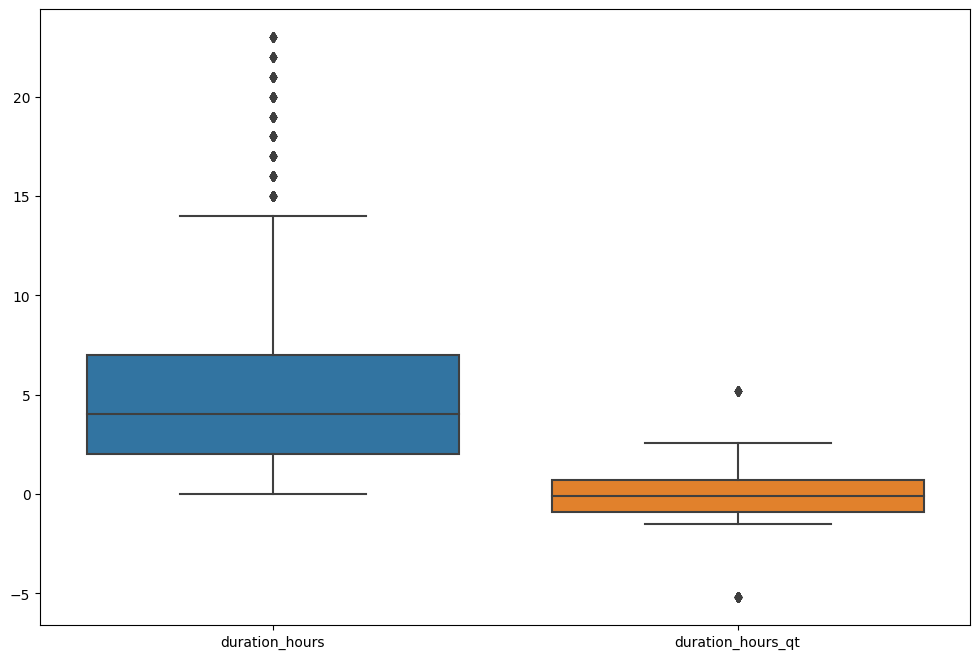

In [28]:
fig , ax = plt.subplots(figsize=(12,8))

sns.boxplot(final_data[['duration_hours','duration_hours_qt']])


<Axes: xlabel='duration_hours', ylabel='Density'>

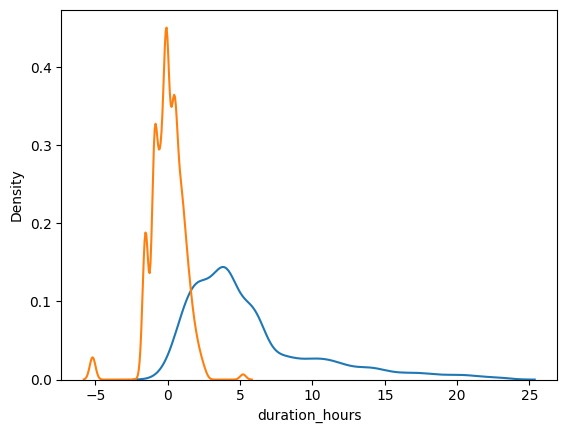

In [29]:
sns.kdeplot(final_data['duration_hours'])
sns.kdeplot(final_data['duration_hours_qt'])

<Axes: xlabel='duration_hours_qt', ylabel='Count'>

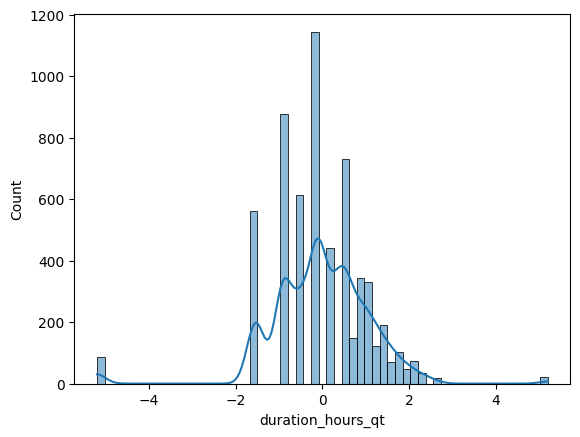

In [30]:
sns.histplot(data = final_data, x= 'duration_hours_qt', kde = True)

##Outlier Detection

In [31]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')

y_pred = clf.fit_predict(final_data.duration_hours_qt.values.reshape(-1,1)) == 1

dropped_points = []

for i in range(len(y_pred)):
    if y_pred[i] == False:
        dropped_points.append(i)


final_data.drop(dropped_points, inplace=True)
final_data = final_data.reset_index()
final_data = final_data.drop('index',axis=1)

<Axes: xlabel='type', ylabel='duration_hours_qt'>

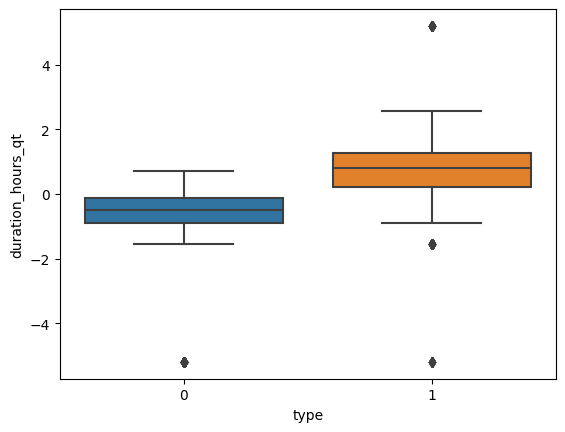

In [32]:
sns.boxplot(data=final_data, x='type', y='duration_hours_qt')

<Axes: xlabel='type', ylabel='duration_hours_qt'>

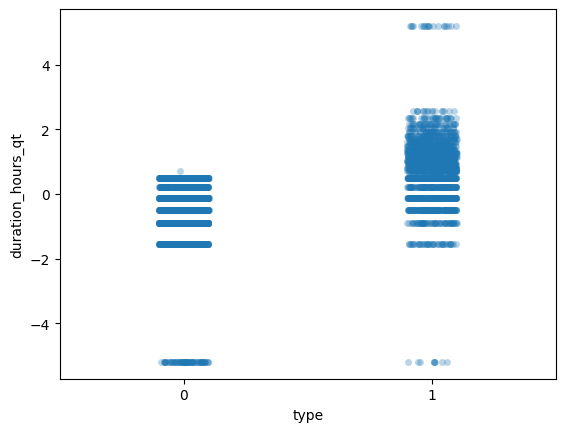

In [33]:
sns.stripplot(data=final_data, x='type', y='duration_hours_qt',alpha=0.3)

##Feature Importance

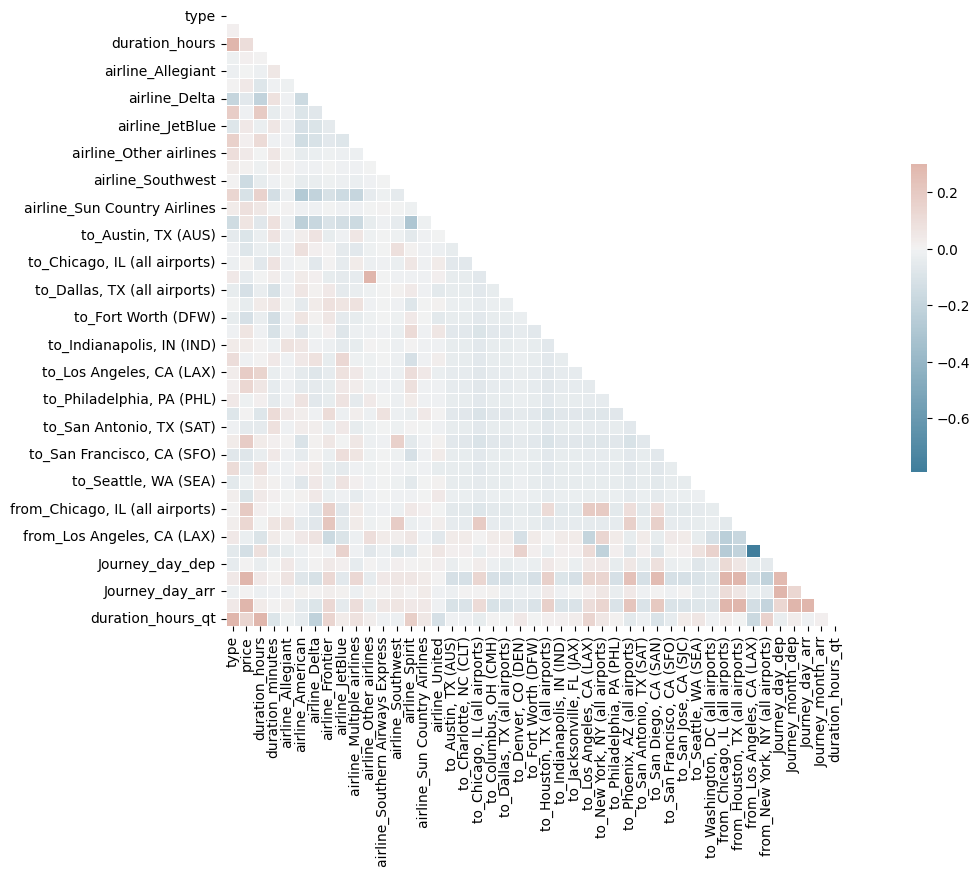

In [34]:
fig, ax = plt.subplots(1,1,figsize=(18,8))

correlation = final_data.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, ax=ax, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

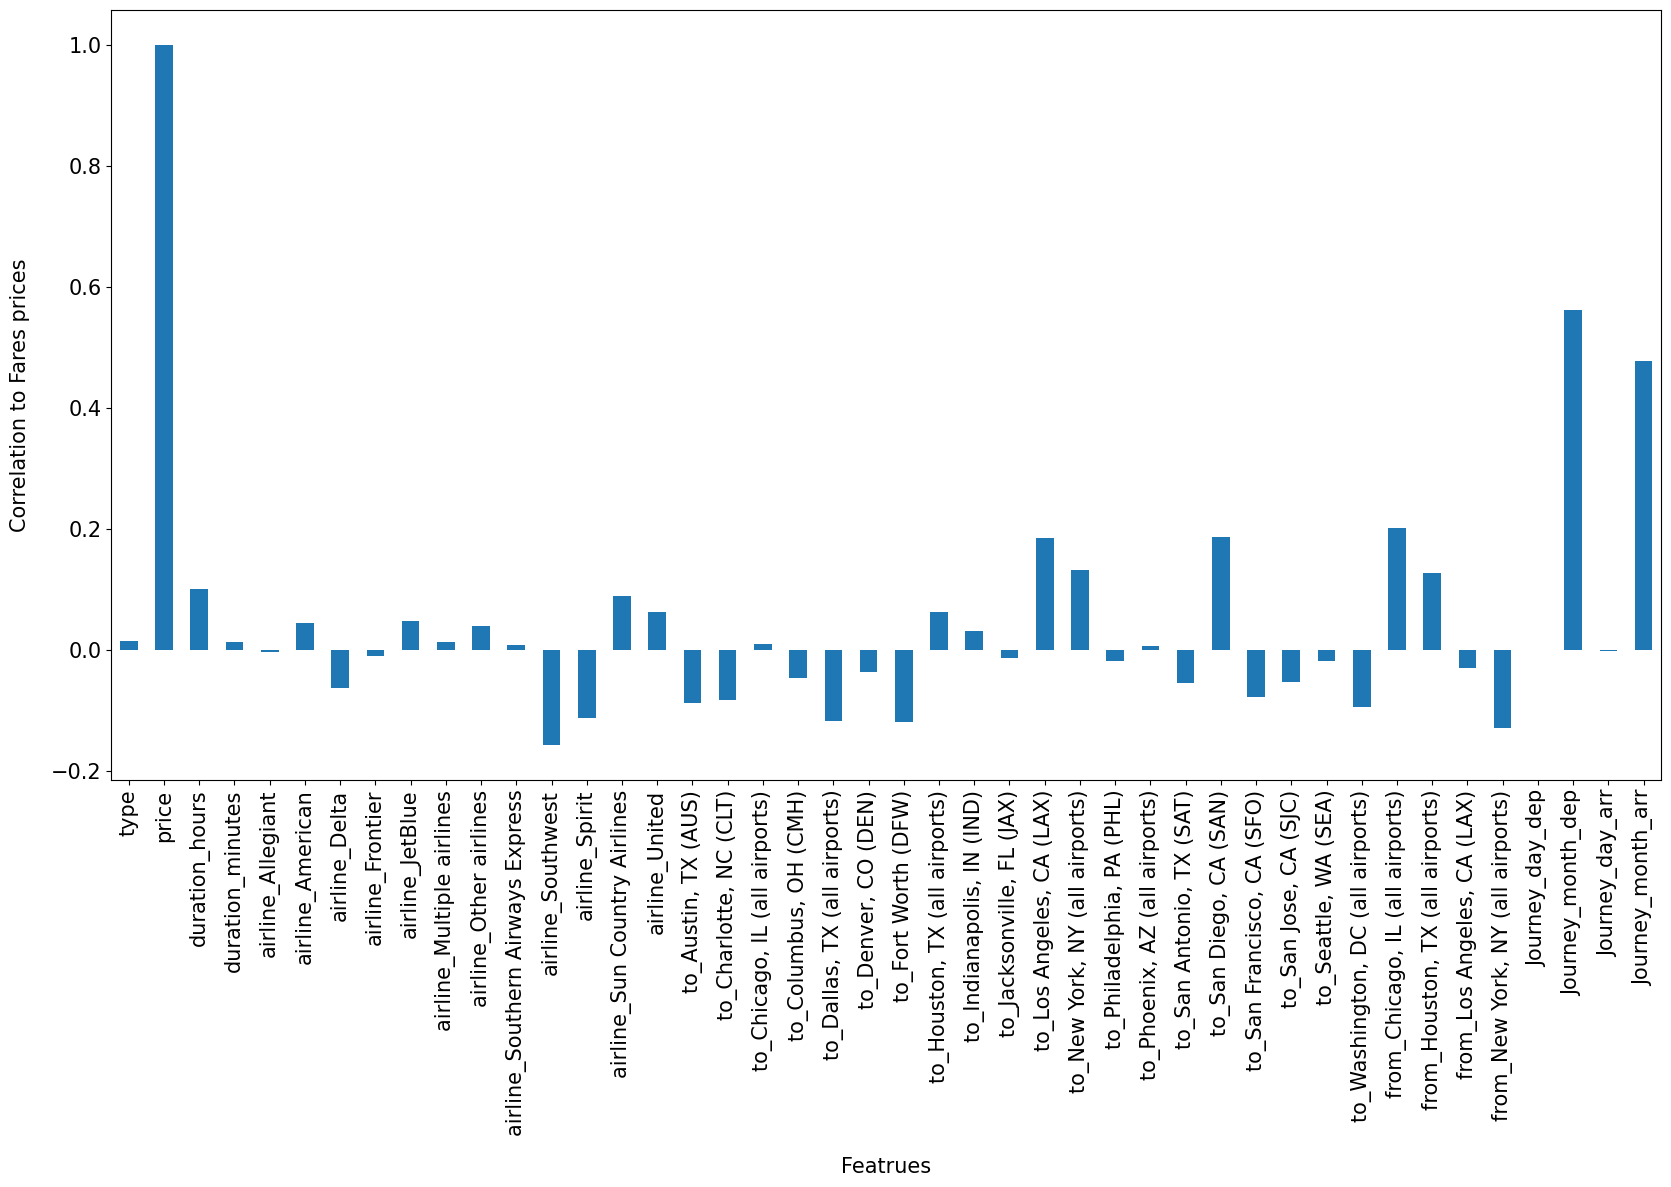

In [35]:
correlated_values = final_data.iloc[:,:-1].corrwith(final_data['price'])
correlated_values.plot.bar(figsize=(20,10), fontsize=15)
plt.ylabel('Correlation to Fares prices', fontsize=15, labelpad=15)
plt.xlabel('Featrues', fontsize=15, labelpad=15);

##Filtering the correct Data

In [36]:
data_tsa = final_data[(final_data.airline_Spirit==1) &
                 (final_data['to_Los Angeles, CA (LAX)']==1) &
                 (final_data['from_New York, NY (all airports)'] == 1)]

data_tsa.reset_index(inplace=True)
data_tsa = data_tsa.drop('index',axis=1)

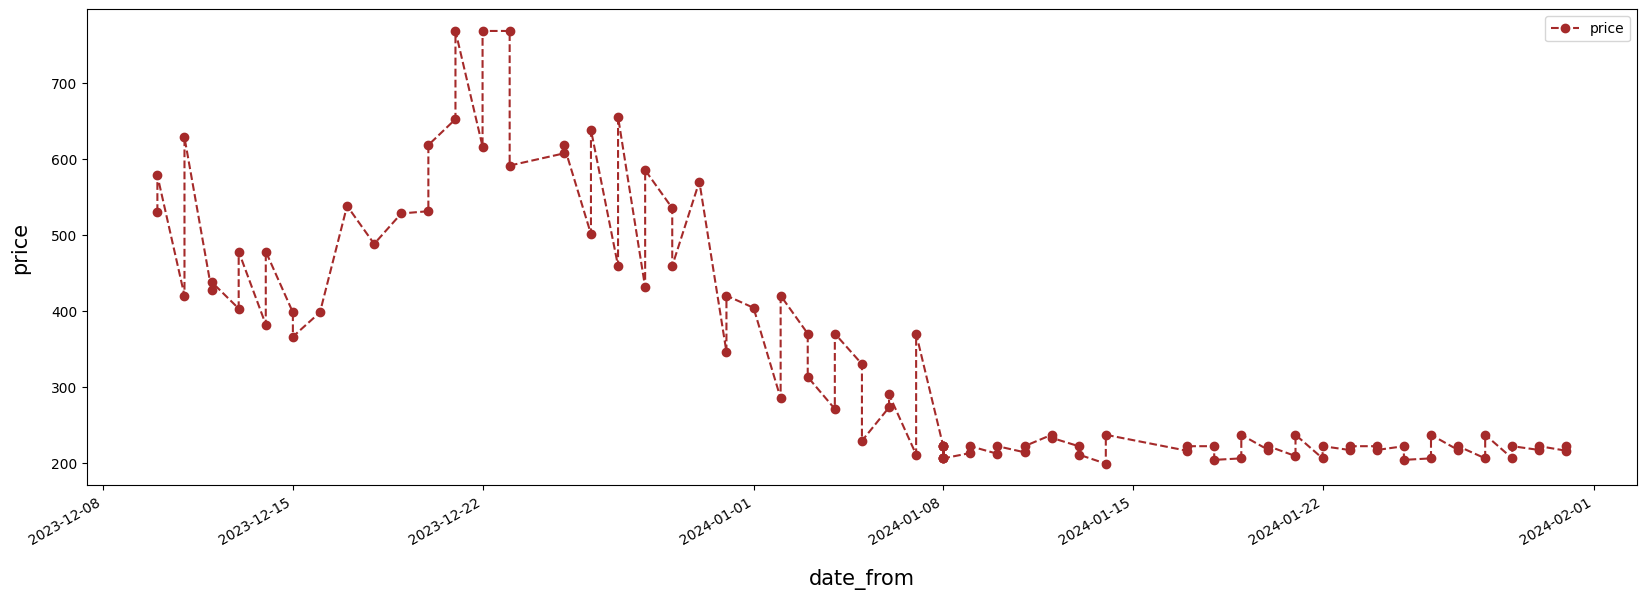

In [37]:
fig, ax = plt.subplots(1,1,figsize=(20,7))


data_tsa.plot(x='date_from', y='price', color='brown', style='--o', ax=ax)
ax.set_ylabel('price', labelpad=15, fontsize=15)
ax.set_xlabel('date_from', labelpad=15, fontsize=15);

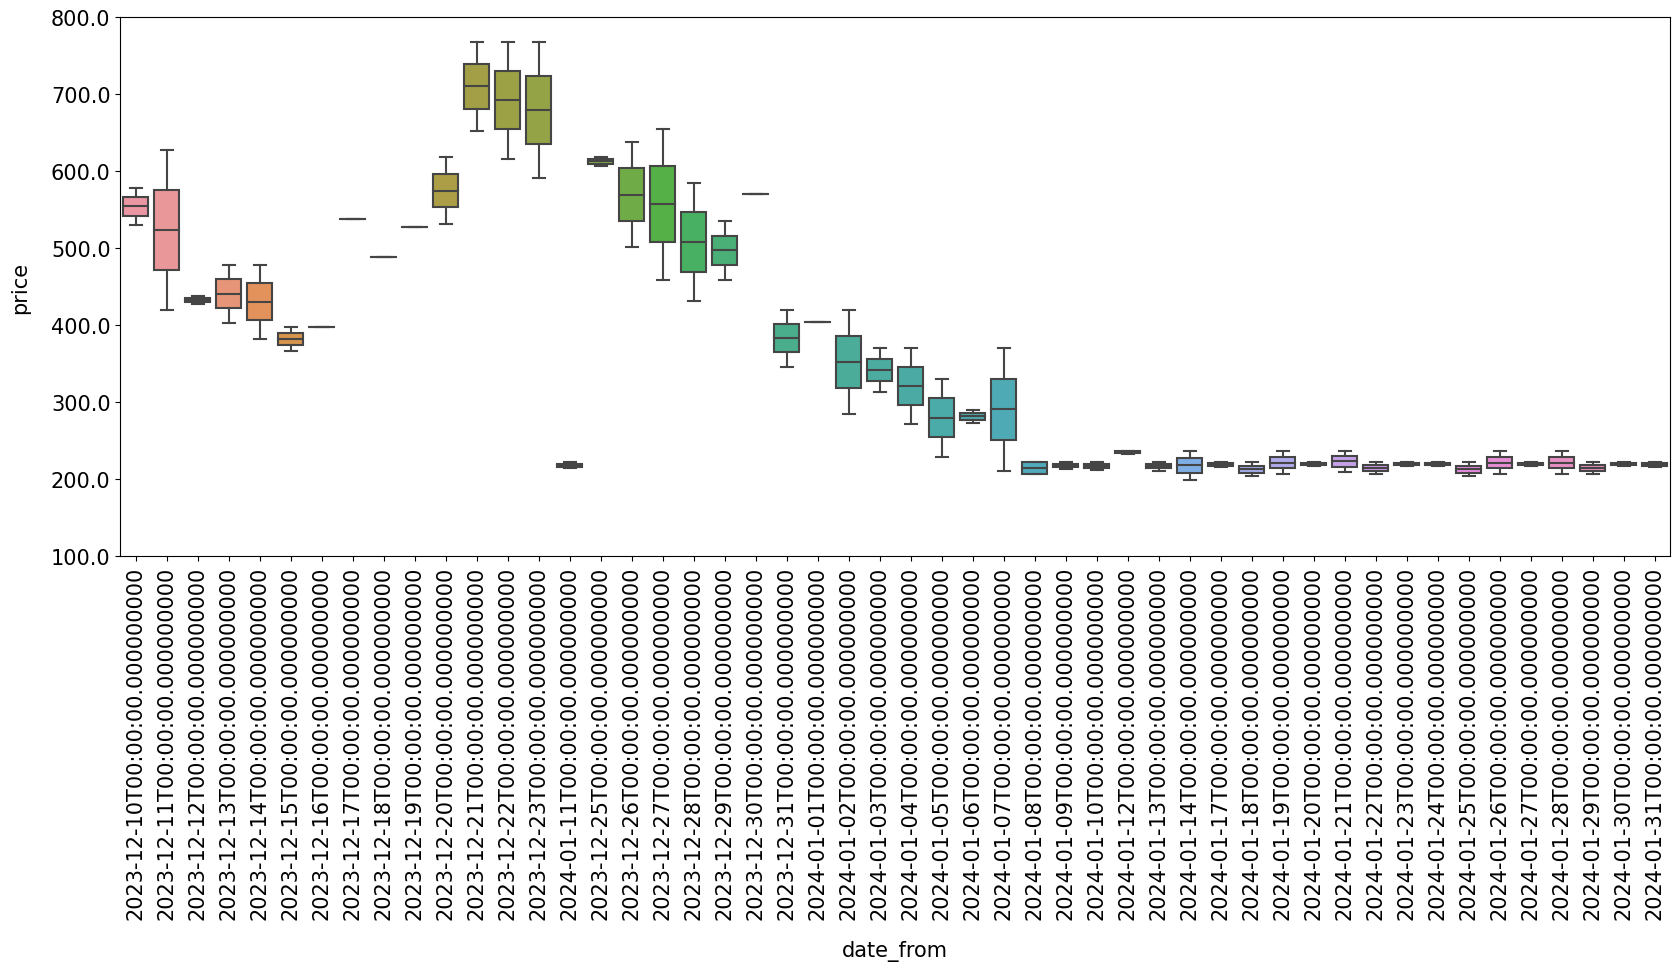

In [38]:
fig, ax = plt.subplots(1,1,figsize=(20,7))

sns.boxplot(data=data_tsa, x='date_from', y='price')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=90)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(), fontsize=15)

ax.set_ylabel('price', fontsize=15, labelpad=15)
ax.set_xlabel('date_from', fontsize=15, labelpad=15);

##Trend Analysis

In [39]:
data_tsa.shape

(100, 47)

In [40]:
train = data_tsa[:70]
test = data_tsa[70:]

In [41]:
import plotly.express as px

train_min_prices = train.groupby('date_from')['price'].min().reset_index()

fig = px.bar(train_min_prices, x='date_from', y='price',
             labels={'price': 'Minimum Price', 'day': 'Date'},
             title='Minimum Price Trends for Each Day')

test_min_prices = test.groupby('date_from')['price'].min().reset_index()

fig.add_bar(x=test_min_prices['date_from'], y=test_min_prices['price'],
            name='Test Data')

fig.update_layout(yaxis_title=dict(text='Minimum Price', font=dict(size=15)),
                  xaxis_title=dict(text='Date', font=dict(size=15)),
                  height=500, width=1000)

fig.show()

In [42]:
pd.set_option('display.max_columns', None)
data_tsa

,date_to,date_from,type,price,duration_hours,duration_minutes,airline_Allegiant,airline_American,airline_Delta,airline_Frontier,airline_JetBlue,airline_Multiple airlines,airline_Other airlines,airline_Southern Airways Express,airline_Southwest,airline_Spirit,airline_Sun Country Airlines,airline_United,"to_Austin, TX (AUS)","to_Charlotte, NC (CLT)","to_Chicago, IL (all airports)","to_Columbus, OH (CMH)","to_Dallas, TX (all airports)","to_Denver, CO (DEN)",to_Fort Worth (DFW),"to_Houston, TX (all airports)","to_Indianapolis, IN (IND)","to_Jacksonville, FL (JAX)","to_Los Angeles, CA (LAX)","to_New York, NY (all airports)","to_Philadelphia, PA (PHL)","to_Phoenix, AZ (all airports)","to_San Antonio, TX (SAT)","to_San Diego, CA (SAN)","to_San Francisco, CA (SFO)","to_San Jose, CA (SJC)","to_Seattle, WA (SEA)","to_Washington, DC (all airports)","from_Chicago, IL (all airports)","from_Houston, TX (all airports)","from_Los Angeles, CA (LAX)","from_New York, NY (all airports)",Journey_day_dep,Journey_month_dep,Journey_day_arr,Journey_month_arr,duration_hours_qt
0,2023-12-18,2023-12-10,1,530,14,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,10,12,18,12,1.482240
1,2023-12-18,2023-12-10,0,578,6,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,10,12,18,12,0.488423
2,2023-12-18,2023-12-11,1,420,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,12,18,12,-5.199338
3,2023-12-18,2023-12-11,0,628,6,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,12,18,12,0.488423
4,2023-12-18,2023-12-12,1,427,18,24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12,12,18,12,1.925969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-02-05,2024-01-29,0,222,6,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,29,1,5,2,0.488423
96,2024-02-05,2024-01-30,1,217,10,33,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,5,2,1.018128
97,2024-02-05,2024-01-30,0,222,6,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,5,2,0.488423
98,2024-02-06,2024-01-31,1,216,9,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,31,1,6,2,0.913991


In [43]:
min_prices = data_tsa.groupby('date_from')['price'].min().reset_index()
min_prices.head()

,date_from,price
0,2023-12-10,530
1,2023-12-11,420
2,2023-12-12,427
3,2023-12-13,403
4,2023-12-14,382


In [44]:
min_prices.shape

(50, 2)

##Dickey-Fuller test to check for stationarity of the data

In [45]:
# Second-order differencing
min_prices['price_diff'] = min_prices['price'] - 2 * min_prices['price'].shift(1) + min_prices['price'].shift(2)
min_prices = min_prices.dropna()


# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(min_prices['price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.134191199988412
p-value: 0.2309901905756776
Critical Values: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}


##ARIMA Model

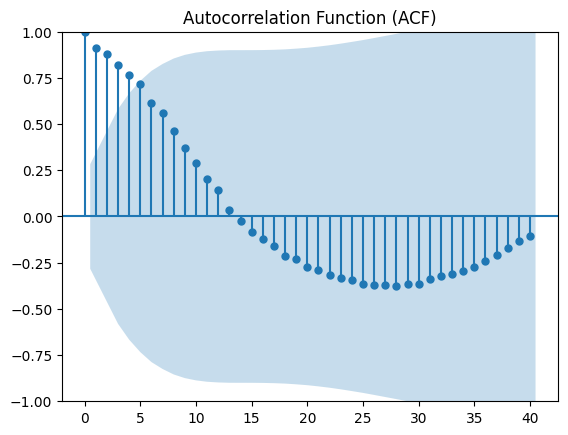

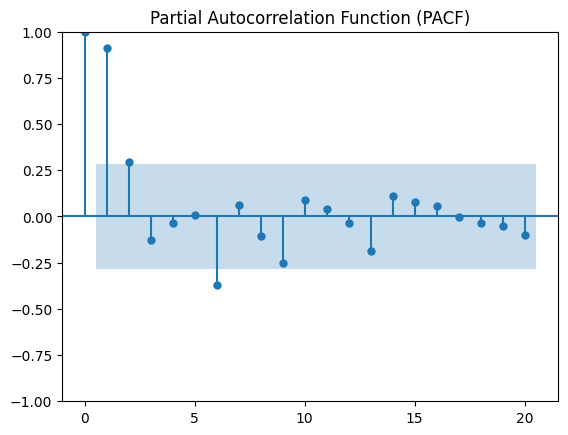

In [46]:
# Assuming 'price' is the column containing flight prices in your DataFrame
price_series = min_prices['price']

# Plot ACF
plot_acf(price_series, lags=40, title='Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(price_series, lags=20, title='Partial Autocorrelation Function (PACF)')
plt.show()

In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

train = min_prices.iloc[:40]
test = min_prices.iloc[40:]

model = ARIMA(train['price'], order=(1, 1, 1))
results = model.fit()

forecast_steps = len(test)
predictions = results.get_prediction(start=len(train), end=len(train) + forecast_steps - 1)

predicted_values = predictions.predicted_mean
ci_lower = predictions.conf_int()['lower price']
ci_upper = predictions.conf_int()['upper price']

print(predictions.summary_frame())

# Create a DataFrame to store actual and predicted values
cv_results = pd.DataFrame({'Date': test.date_from, 'Actual': test['price'], 'Predicted': predicted_values})

price        mean     mean_se  mean_ci_lower  mean_ci_upper
40     213.336709   57.424915     100.785944     325.887474
41     215.308456   69.201539      79.675932     350.940979
42     214.247174   84.643028      48.349888     380.144460
43     214.818403   95.071338      28.482005     401.154801
44     214.510942  105.712874       7.317516     421.704368
45     214.676431  114.753728     -10.236743     439.589606
46     214.587357  123.443162     -27.356794     456.531509
47     214.635301  131.402462     -42.908791     472.179393


In [51]:
train['data'] = 'train'
test['data'] = 'test'

df_test = train[['date_from', 'price', 'data']]
df_test = pd.concat([df_test, test[['date_from', 'price', 'data']]], ignore_index=True)
df_test['predict'] = None
df_test.loc['test' == df_test['data'], 'predict'] = cv_results['Predicted']

df_test

,date_from,price,data,predict
0,2023-12-12,427,train,None
1,2023-12-13,403,train,None
2,2023-12-14,382,train,None
3,2023-12-15,366,train,None
4,2023-12-16,398,train,None
5,2023-12-17,538,train,None
6,2023-12-18,488,train,None
7,2023-12-19,528,train,None
8,2023-12-20,531,train,None
9,2023-12-21,652,train,None


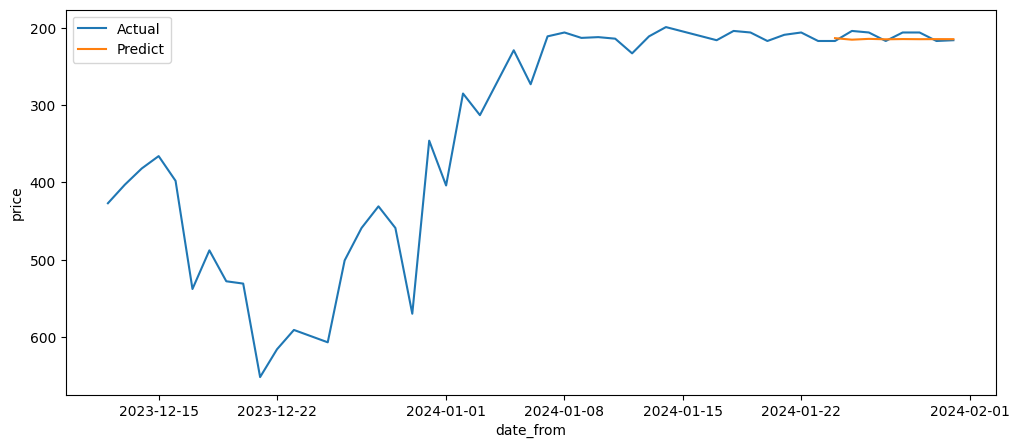

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(data=df_test, x='date_from', y='price', label='Actual', ax=ax)
sns.lineplot(data=df_test, x='date_from', y='predict', label='Predict', ax=ax)
plt.legend()
plt.show()